**EDA OF THE PROJECT**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,Hospital_Id,Supplier_Name,Supplier_Reliability,Equipment_Height,Equipment_Width,Equipment_Weight,Equipment_Type,Equipment_Value,Base_Transport_Fee,CrossBorder_Shipping,Urgent_Shipping,Installation_Service,Transport_Method,Fragile_Equipment,Hospital_Info,Rural_Hospital,Order_Placed_Date,Delivery_Date,Hospital_Location,Transport_Cost
0,fffe3200360030003700,Jo Valencia,0.44,21.0,6.0,NaN,NaN,3.62,17.13,No,No,No,Roadways,No,Working Class,No,10/20/17,10/20/17,APO AA 33776,179.50
1,fffe3400380037003400,Wanda Warren,0.58,29.0,20.0,1210684.0,Marble,9703.37,35.42,No,Yes,Yes,Roadways,No,Working Class,No,02/22/16,02/24/16,"South Kevin, VT 84493",627732.45
2,fffe3200350036003700,Robert Ackies,0.97,39.0,15.0,3305.0,Aluminium,40.21,18.54,No,No,No,Roadways,No,Working Class,No,01/11/18,01/10/18,"Kevinshire, NE 31279",1565.92
3,fffe3800320034003400,Charlotte Membreno,0.70,8.0,5.0,606.0,Brass,4.55,17.48,No,No,No,Roadways,No,Working Class,No,08/06/16,08/06/16,DPO AP 61572,257.71
4,fffe3600340033003000,Nena Silva,0.66,27.0,13.0,NaN,Marble,2726.80,30.23,Yes,No,No,Roadways,No,Working Class,NaN,12/15/16,12/17/16,"Joshuamouth, AK 01550",8553.52


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hospital_Id           5000 non-null   object 
 1   Supplier_Name         5000 non-null   object 
 2   Supplier_Reliability  4413 non-null   float64
 3   Equipment_Height      4717 non-null   float64
 4   Equipment_Width       4557 non-null   float64
 5   Equipment_Weight      4540 non-null   float64
 6   Equipment_Type        4401 non-null   object 
 7   Equipment_Value       5000 non-null   float64
 8   Base_Transport_Fee    5000 non-null   float64
 9   CrossBorder_Shipping  5000 non-null   object 
 10  Urgent_Shipping       5000 non-null   object 
 11  Installation_Service  5000 non-null   object 
 12  Transport_Method      3929 non-null   object 
 13  Fragile_Equipment     5000 non-null   object 
 14  Hospital_Info         5000 non-null   object 
 15  Rural_Hospital       

In [ ]:
float_list = ['Supplier_Reliability', 'Equipment_Height', 'Equipment_Width', 'Equipment_Weight', 'Equipment_Value', 'Base_Transport_Fee','Transport_Cost']

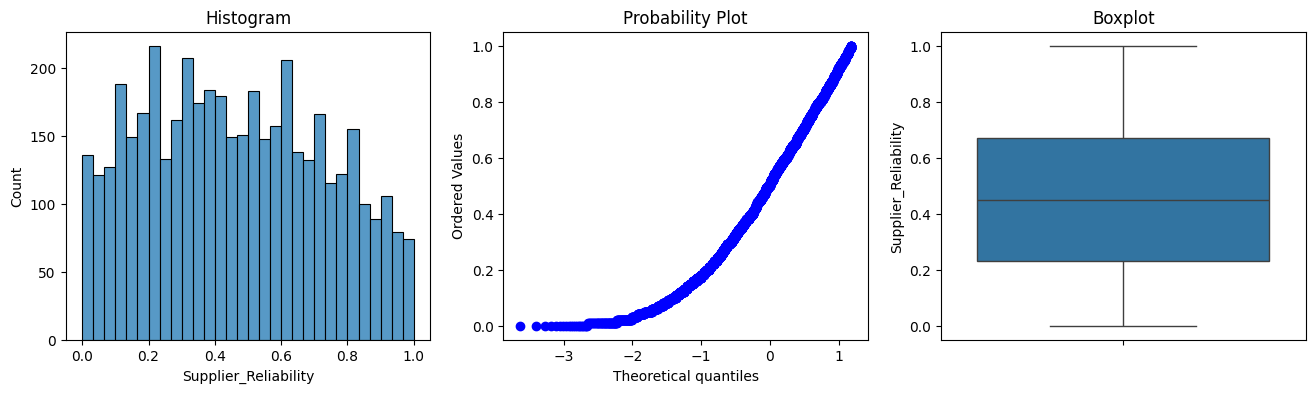

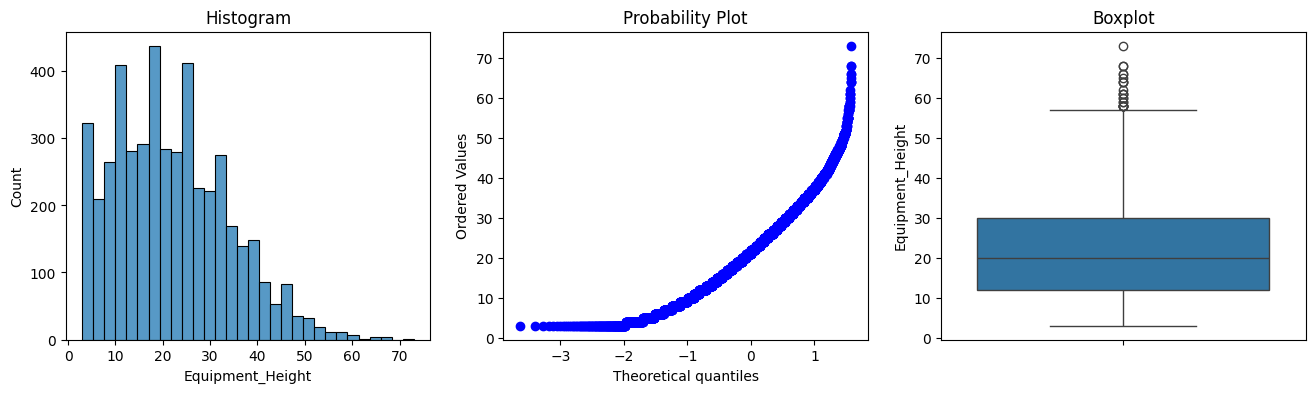

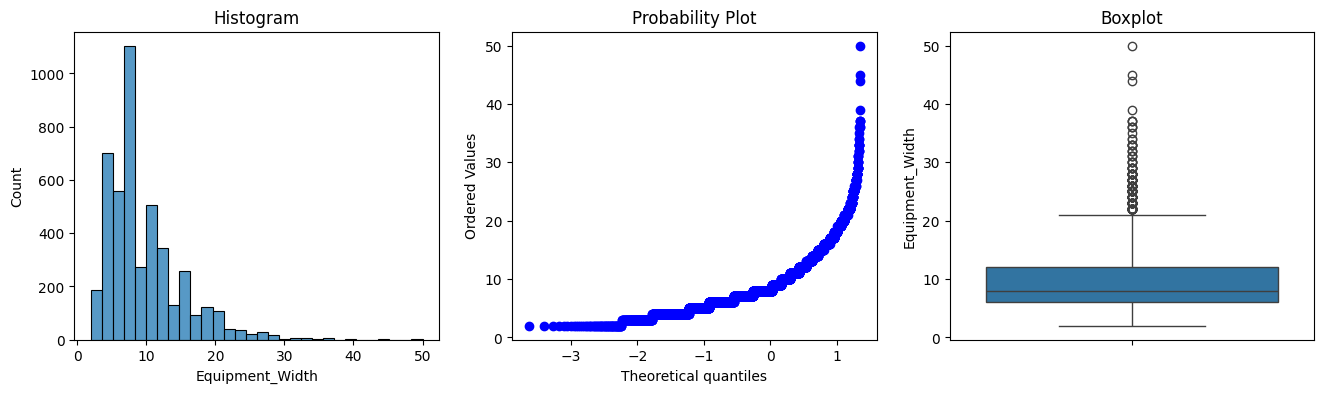

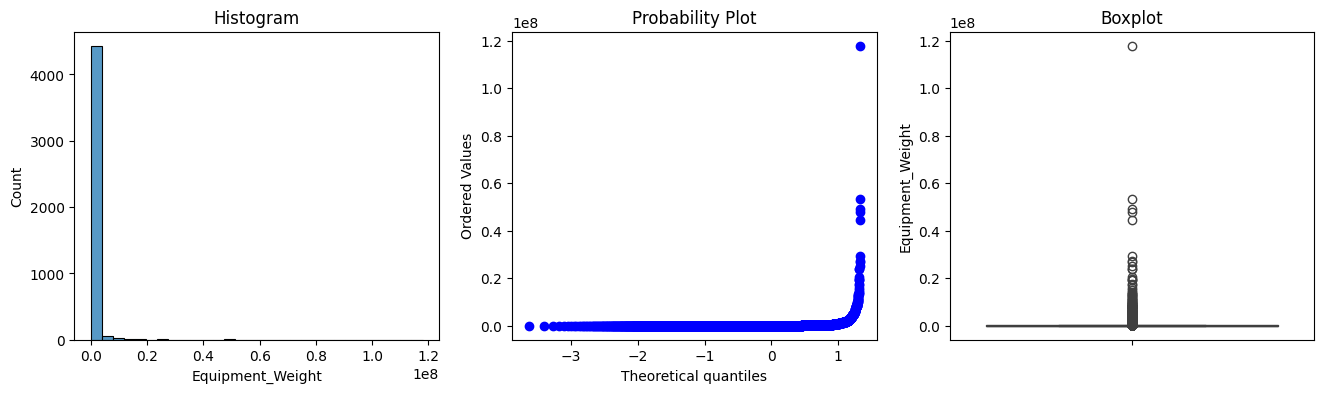

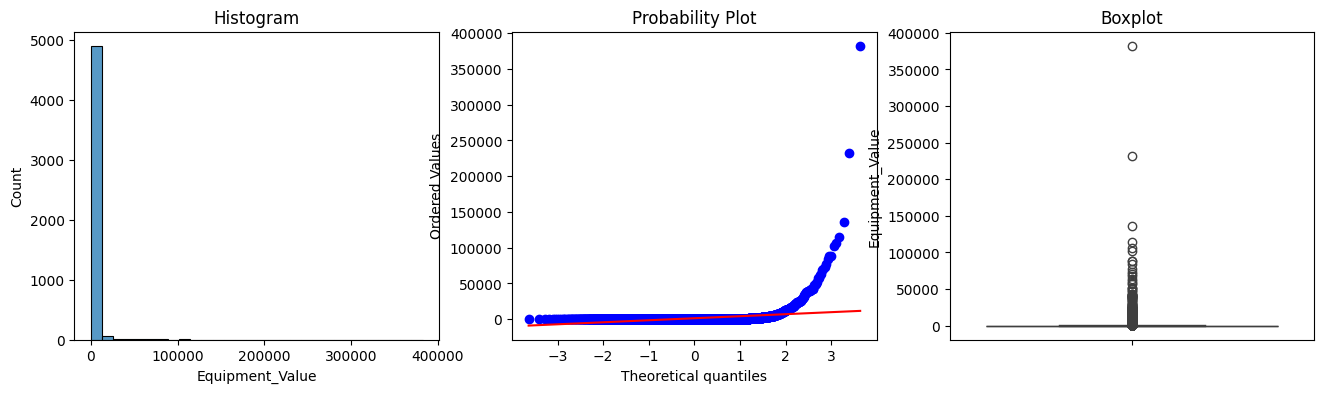

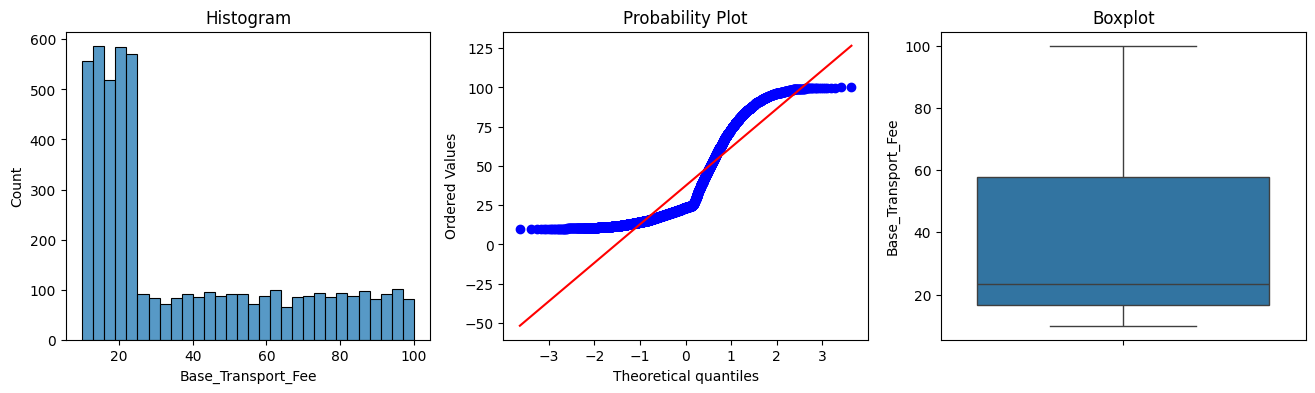

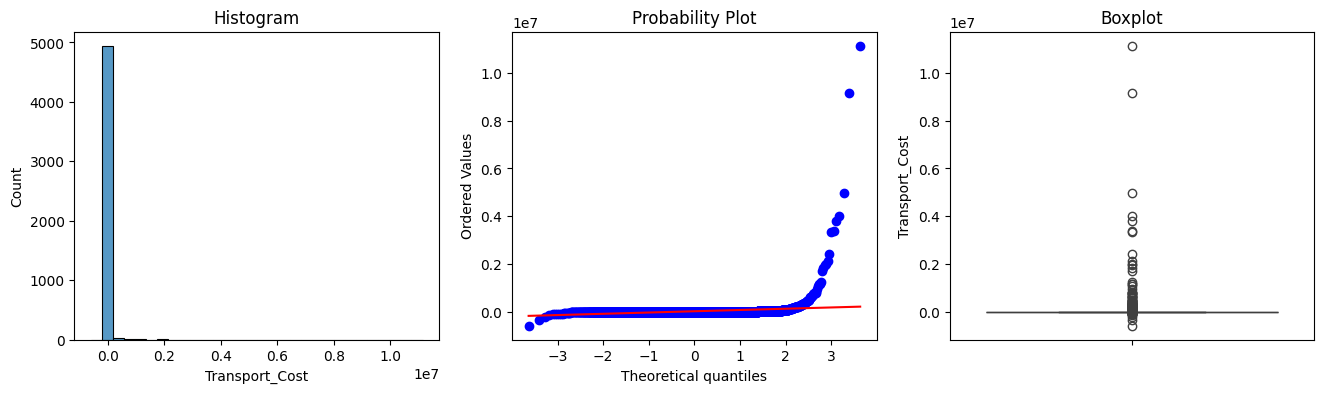

In [ ]:
for col in float_list:

    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(train_df[col], bins = 30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(train_df[col], dist = "norm", plot = plt)
    plt.title('Probability Plot')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = train_df[col])
    plt.title('Boxplot')

    plt.show()

In [ ]:
train_df['Transport_Cost'].unique()

array([1.7950000e+02, 6.2773245e+05, 1.5659200e+03, ..., 5.1654500e+03,
       1.2415000e+02, 3.7328000e+02])

/tmp/ipython-input-386449199.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Transport_Cost'], kde = False, color ='red')


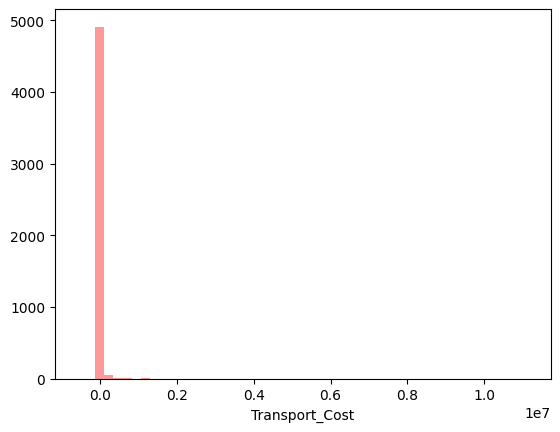

In [ ]:
sns.distplot(train_df['Transport_Cost'], kde = False, color ='red')
plt.show()

In [ ]:
train_df['Transport_Cost']=train_df['Transport_Cost'].abs()
train_df['Transport_Cost']=np.log(train_df['Transport_Cost'])

In [ ]:
train_df['Transport_Cost'].unique()

array([ 5.19017521, 13.34986932,  7.35622879, ...,  8.5497475 ,
        4.82149051,  5.92232881])

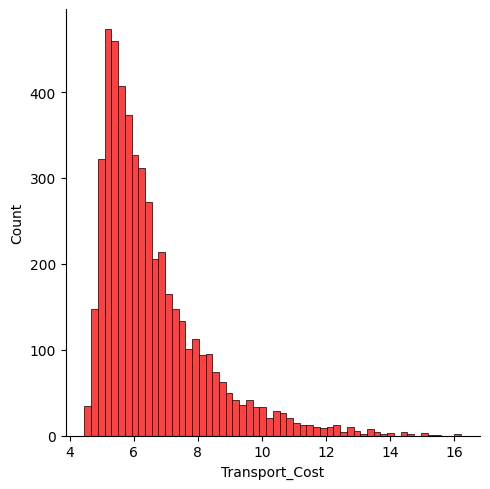

In [ ]:
sns.displot(train_df['Transport_Cost'], kde = False, color ='red')

In [ ]:
for col in float_list:
    print(f'{col}: {train_df[col].skew(skipna=True)}')

Supplier_Reliability: 0.14428848753164428
Equipment_Height: 0.5800251831932504
Equipment_Width: 1.5950530144963881
Equipment_Weight: 22.595815822232087
Equipment_Value: 24.093047437661273
Base_Transport_Fee: 0.9209600684462876
Transport_Cost: 1.741289645407552


In [ ]:
train_df['Equipment_Value'] = np.log(train_df ['Equipment_Value'])
train_df.head(5)

,Hospital_Id,Supplier_Name,Supplier_Reliability,Equipment_Height,Equipment_Width,Equipment_Weight,Equipment_Type,Equipment_Value,Base_Transport_Fee,CrossBorder_Shipping,Urgent_Shipping,Installation_Service,Transport_Method,Fragile_Equipment,Hospital_Info,Rural_Hospital,Order_Placed_Date,Delivery_Date,Hospital_Location,Transport_Cost
0,fffe3200360030003700,Jo Valencia,0.44,21.0,6.0,NaN,NaN,1.286474,17.13,No,No,No,Roadways,No,Working Class,No,10/20/17,10/20/17,APO AA 33776,5.190175
1,fffe3400380037003400,Wanda Warren,0.58,29.0,20.0,1210684.0,Marble,9.180229,35.42,No,Yes,Yes,Roadways,No,Working Class,No,02/22/16,02/24/16,"South Kevin, VT 84493",13.349869
2,fffe3200350036003700,Robert Ackies,0.97,39.0,15.0,3305.0,Aluminium,3.694116,18.54,No,No,No,Roadways,No,Working Class,No,01/11/18,01/10/18,"Kevinshire, NE 31279",7.356229
3,fffe3800320034003400,Charlotte Membreno,0.70,8.0,5.0,606.0,Brass,1.515127,17.48,No,No,No,Roadways,No,Working Class,No,08/06/16,08/06/16,DPO AP 61572,5.551835
4,fffe3600340033003000,Nena Silva,0.66,27.0,13.0,NaN,Marble,7.910884,30.23,Yes,No,No,Roadways,No,Working Class,NaN,12/15/16,12/17/16,"Joshuamouth, AK 01550",9.054098


/tmp/ipython-input-2930085445.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Equipment_Value'], kde = False, color ='red')


<Axes: xlabel='Equipment_Value'>

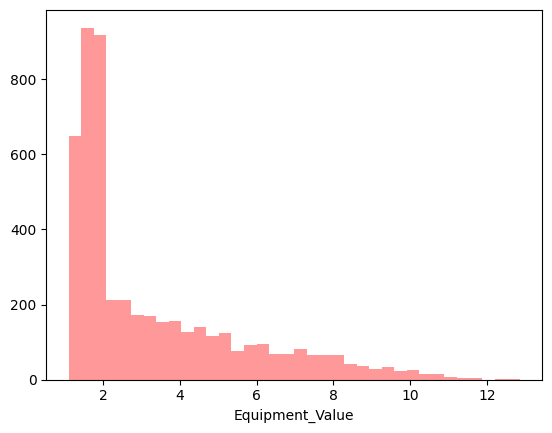

In [ ]:
sns.distplot(train_df['Equipment_Value'], kde = False, color ='red')

In [ ]:
train_df['Order_Placed_Date'] = pd.to_datetime(train_df['Order_Placed_Date'],format='%m/%d/%y')
train_df['Delivery_Date'] =  pd.to_datetime(train_df['Delivery_Date'],format='%m/%d/%y')
train_df.head(5)

,Hospital_Id,Supplier_Name,Supplier_Reliability,Equipment_Height,Equipment_Width,Equipment_Weight,Equipment_Type,Equipment_Value,Base_Transport_Fee,CrossBorder_Shipping,Urgent_Shipping,Installation_Service,Transport_Method,Fragile_Equipment,Hospital_Info,Rural_Hospital,Order_Placed_Date,Delivery_Date,Hospital_Location,Transport_Cost
0,fffe3200360030003700,Jo Valencia,0.44,21.0,6.0,NaN,NaN,1.286474,17.13,No,No,No,Roadways,No,Working Class,No,2017-10-20,2017-10-20,APO AA 33776,5.190175
1,fffe3400380037003400,Wanda Warren,0.58,29.0,20.0,1210684.0,Marble,9.180229,35.42,No,Yes,Yes,Roadways,No,Working Class,No,2016-02-22,2016-02-24,"South Kevin, VT 84493",13.349869
2,fffe3200350036003700,Robert Ackies,0.97,39.0,15.0,3305.0,Aluminium,3.694116,18.54,No,No,No,Roadways,No,Working Class,No,2018-01-11,2018-01-10,"Kevinshire, NE 31279",7.356229
3,fffe3800320034003400,Charlotte Membreno,0.70,8.0,5.0,606.0,Brass,1.515127,17.48,No,No,No,Roadways,No,Working Class,No,2016-08-06,2016-08-06,DPO AP 61572,5.551835
4,fffe3600340033003000,Nena Silva,0.66,27.0,13.0,NaN,Marble,7.910884,30.23,Yes,No,No,Roadways,No,Working Class,NaN,2016-12-15,2016-12-17,"Joshuamouth, AK 01550",9.054098


In [ ]:
np.sum(train_df['Order_Placed_Date'] - train_df['Delivery_Date'] < pd.Timedelta(seconds=0))

np.int64(1973)

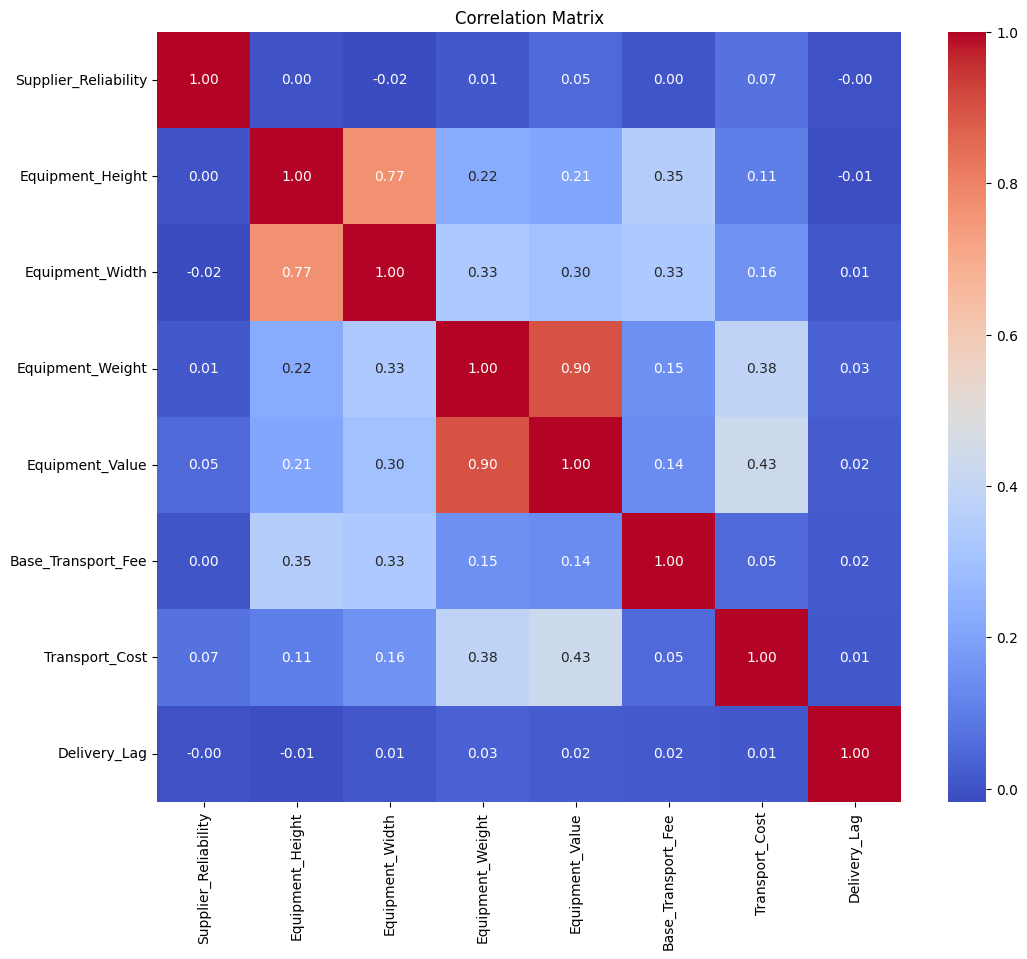

In [7]:
# Calculate delivery lag
train_df['Delivery_Lag'] = (train_df['Delivery_Date'] - train_df['Order_Placed_Date']).dt.days

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Unique values in 'Hospital_Id':
['fffe3200360030003700' 'fffe3400380037003400' 'fffe3200350036003700' ...
 'fffe380034003700' 'fffe3600310031003200' 'fffe3100300038003300']

Value counts for 'Hospital_Id':
Hospital_Id
fffe3100300038003300    1
fffe3200360030003700    1
fffe3400380037003400    1
fffe3200350036003700    1
fffe3800320034003400    1
                       ..
fffe3900350032003600    1
fffe3400390037003500    1
fffe3400380036003400    1
fffe3500350034003500    1
fffe3300380031003500    1
Name: count, Length: 5000, dtype: int64

Unique values in 'Supplier_Name':
['Jo Valencia' 'Wanda Warren' 'Robert Ackies' ... 'Flora Spencer'
 'Rena Best' 'Jacob Buckley']

Value counts for 'Supplier_Name':
Supplier_Name
James Moore         3
James White         3
Robert Davis        3
John Brown          3
John Johnson        2
                   ..
Heather Smith       1
Geraldine Steele    1
Kenneth Davis       1
Helen Wynn          1
Sandra Mitchell     1
Name: count, Length: 4966, dtype:



Now, let's visualize the distribution of the 'Delivery_Lag' to understand the typical delivery times and identify any potential outliers or patterns.

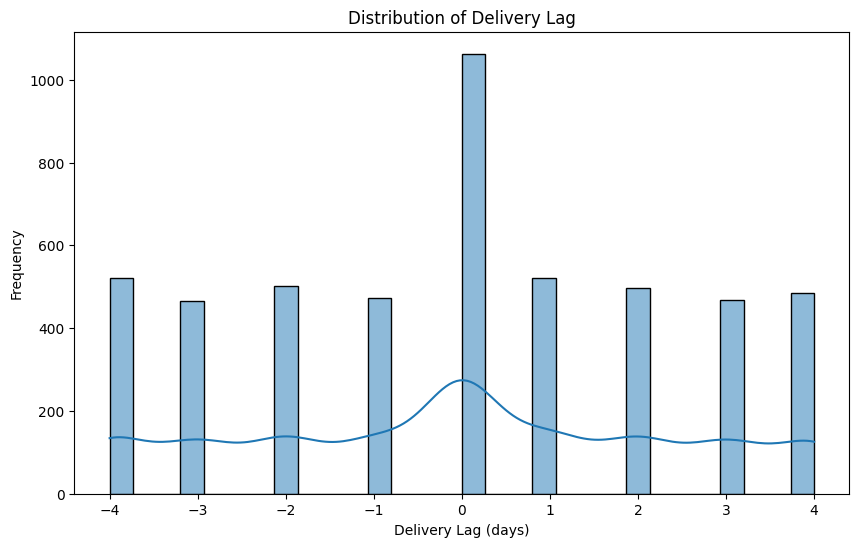

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Delivery_Lag'], bins=30, kde=True)
plt.title('Distribution of Delivery Lag')
plt.xlabel('Delivery Lag (days)')
plt.ylabel('Frequency')
plt.show()

### Exploring Categorical Features


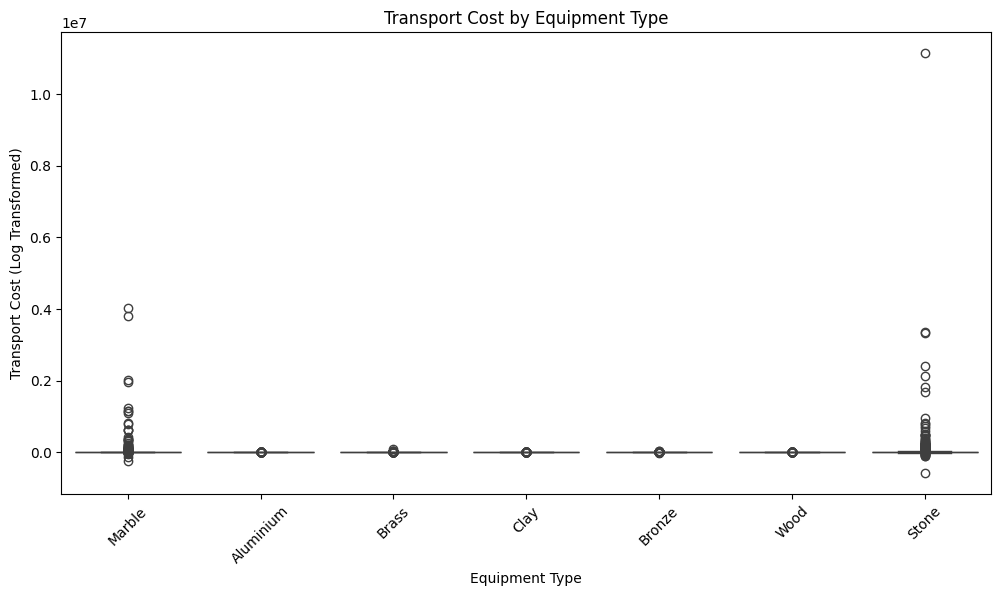

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Equipment_Type', y='Transport_Cost', data=train_df)
plt.title('Transport Cost by Equipment Type')
plt.xlabel('Equipment Type')
plt.ylabel('Transport Cost (Log Transformed)')
plt.xticks(rotation=45)
plt.show()

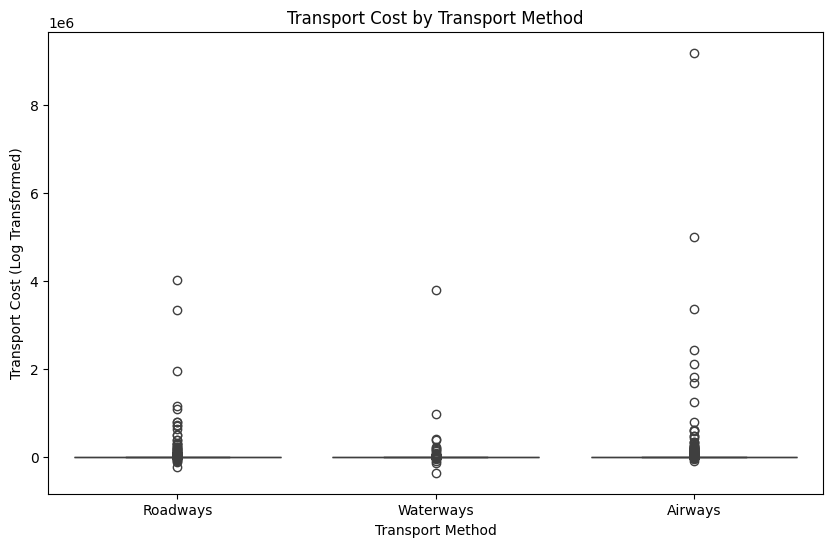

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transport_Method', y='Transport_Cost', data=train_df)
plt.title('Transport Cost by Transport Method')
plt.xlabel('Transport Method')
plt.ylabel('Transport Cost (Log Transformed)')
plt.show()

### Deep Dive into EDA

Now that we have a basic understanding of the individual features and some relationships, let's explore more complex interactions and their impact on 'Transport_Cost'. We can look at how combinations of features or specific subgroups behave.

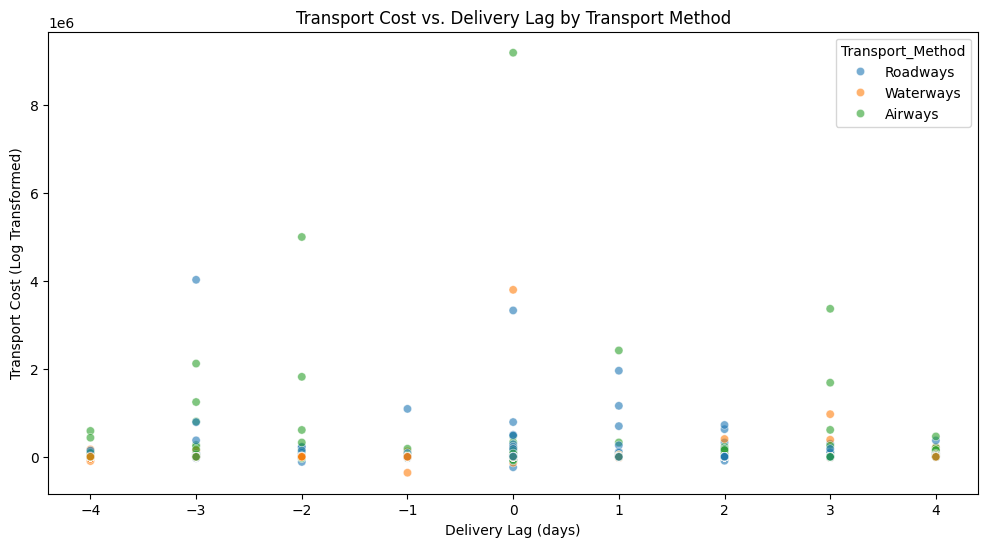

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Delivery_Lag', y='Transport_Cost', hue='Transport_Method', data=train_df, alpha=0.6)
plt.title('Transport Cost vs. Delivery Lag by Transport Method')
plt.xlabel('Delivery Lag (days)')
plt.ylabel('Transport Cost (Log Transformed)')
plt.show()

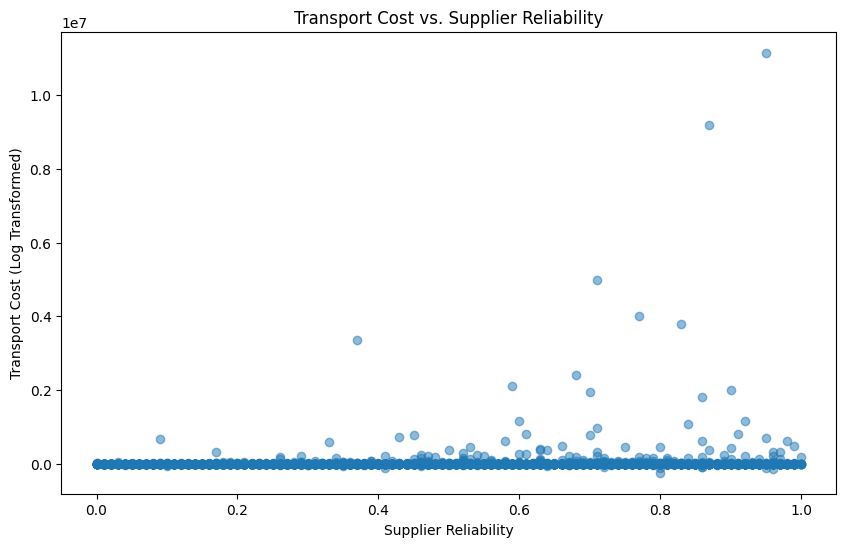

In [19]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Supplier_Reliability', y='Transport_Cost', data=train_df, scatter_kws={'alpha':0.5})
plt.title('Transport Cost vs. Supplier Reliability')
plt.xlabel('Supplier Reliability')
plt.ylabel('Transport Cost (Log Transformed)')
plt.show()